# TMA4320 Introduksjon til vitenskapelige beregninger - P-03 

## Baklengs Euler

I denne oppgaven skal du implementere metoden baklengs Euler for å løse systemer av differensialligninger 
av typen

$$
    y'(t) = f(y(t)),\quad y\in\mathbb{R}^m,\ f: \mathbb{R}^m\rightarrow\mathbb{R}^m
$$

Vi skal altså implementere metoden som, gitt $y(0)=y_0\in\mathbb{R}^m$ og en konstant skrittlengde $h$, beregner
$y_1, y_2,\ldots$ ved å benytte formelen

$$
     y_{n+1} = y_n + h\, f(y_{n+1})
$$

der $y_n$ er en approksimasjon til den eksakte løsningen $y(t_n)$ og der $t_n=n h$. Lokalt, i hvert skritt, må man løse en ikke-lineær ligning for $y_{n+1}$, vi søker en vektor $z\in\mathbb{R}^m$ slik at 

$$
    G(z) := z-y_n- h\, f(z) = 0
$$

Å løse $G(z)=0$ blir et delproblem som kan angripes med Newton's metode, som kan skrives 

$$
     z^{(k+1)} = z^{(k)} - J_G(z^{(k)})^{-1} G(z^{(k)})\quad\text{der for eksempel}\quad z^{(0)} = y_n
$$

Jacobimatrisen $J_G(z)$ er en $m\times m$-matrise med elementer
$$
    [J_G(z)]_{ij} = \frac{\partial G_i}{\partial y_j}(z)
$$

Med vår $G(z)$ kan vi skrive

$$
J_G(z) = I - hJ_f(z)
$$

* Gitt $z^{(0)}$
* for $k=0,1,2\ldots$
    * Sett $A=J_G(z^{(k)})=I-hJ_f(z^{(k)})$ 
    * Sett $b=-G(z^{(k)})=y_n+hf(z^{(k)})-z^{(k)}$
    * Løs $A\delta = b$ med hensyn på $\delta$
    * Sett $z^{(k+1)}=z^{(k)}+\delta$
    * avbryt når konvergenskriterium er oppfylt

I denne oppgaven skal du bruke en ferdig numpy-rutine for å løse $A\delta = b$, nemlig **numpy.linalg.solve**.
I vårt tilfelle skriver vi rett og slett **delta=np.linalg.solve(A,b)**.

Som konvergenskriterium bruker vi: **np.linalg.norm(delta)<tol** for en oppgitt toleranse.
Det kan også være nyttig å vite om funksjonen **numpy.eye** for å lage identitetsmatrise.

**Oppgave** 

**(a)** Skriv en funksjon **beuler$\underline{}$step** som angitt nedenfor.

*Svaret på dette delspørsmålet er korrekt utfylt kode i følgende celle*


In [54]:
import numpy as np
import matplotlib.pyplot as plt

def beuler_step(yn,P,h,tol):
    ''' Ta ett skritt med baklengs Euler der 
    yn: initialverdien til skrittet
    P: En klasse som inneholder to funksjoner
        P.f: funksjon som tar ett argument y (numpy array) og returnerer dy=y'=f(y)  (numpy array)
        P.Jf: funksjon som tar ett argument y (numpy array) og returnerer jacobi-matrisen J_f(y) (2D numpy array)
    h: Skrittlengde
    tol: toleranse i Newtoniterasjonen
    Returnerer konvergert løsning etter ett skritt
    '''
    #antar at yn er et numpy array
    errest = 2*tol
    z0 = yn
    m = len(yn)
    while errest > tol:
        A = np.eye(m,m) - h*P.Jf(z0)
        b = yn + h*P.f(z0) - z0
        delta = np.linalg.solve(A,b)
        errest = np.linalg.norm(delta)
        z = z0 + delta
        z0 = z
    return z

**(b)** Skriv en funksjon **beuler**(y0,P,h,tol,nsteps) som tar nsteps skritt med **beuler$\underline{}$step** og returnerer et $2\times n$ numpy array med numerisk løsning av en generell diffligning over et vilkårlig intervall. 
Ta utgangspunkt i følgende template.

*Svaret på dette spørsmålet er korrekt utfylt kode i følgende celle*


In [55]:
def beuler(y0,P,h,tol,nsteps):
    ''' Ta nsteps skritt med baklengs Euler
    y0: Startverdien, numpy-array
    P: Brukerdefinert klasse som beskrevet i beuler_step
    h: Skrittlengde brukt i integrasjonen (se beuler_step)
    tol: Toleranse brukt i Newtoniterasjonen (se beuler_step)
    nsteps: Antall skritt i integrasjonen, løsningsintevallet er [0,h*nsteps]
    Returner Y, et 2x(nsteps+1) numpy array der kolonne k er [yk, yk']^T, numerisk løsning ved tid t=k*h
    '''
    m = len(y0)
    Y = np.zeros((m, nsteps+1))
    Y[:, 0] = y0
    for step in range(1, nsteps+1):
        Y[:,step] = beuler_step(Y[:,step-1], P, h, tol)    
    return Y


**(c)** Vi skal anvende baklengs Euler på en bestemt stiv ligning, nemlig Van der Pol oscillatoren.
Vi supplerer kode for å opprette problemklassen VanDerPol nedenfor. Dette problemet kan skrives som

$$
     y'' - \mu(1-y^2)y' + y = 0
$$

I den supplerte koden er problemet omgjort til et system av to førsteordens diffligninger for $y$ og $y'$.
Bruk $y_0=[2,0]^T$, $h=0.01$, $\mathrm{tol}=10^{-6}$ og $\mathrm{nsteps}=1500$.
Vi bruker $\mu=5$ i vår test, og for å opprette og kalle en instans av klassen skriver man for eksempel


In [46]:
mu = 5
P = VanDerPol(mu)
# P er nå klar til å sendes som input-argument til beuler_step, beuler
# Funksjonene f og Jf kalles som f.eks.
y=np.array([1,2])
print('P.f(y)=',P.f(y))
print('P.Jf(y)=',P.Jf(y))


P.f(y)= [ 2 -1]
P.Jf(y)= [[  0   1]
 [-21   0]]


*Du har svart på spørsmål **(c)** når du har supplert kode og genererte plott og utskrift som følger*

* Har funnet løsningen for Van der Pol oscillatoren med de gitte parametre. 
* Har generert et faseplott av løsningen, det vil si en kurve i $xy$-planet som viser null'te mot første rad for løsningen Y som du får fra **beuler**.
* Har skrevet ut løsningen etter 1000 skritt, dvs Y[:,1000]


Løsning etter 1000 skritt: [-1.01969992  0.60211016]

Faseplott: 


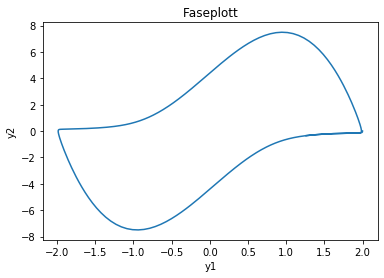

In [56]:
# Skriv kode her for få fram løsning og lage plott og utskrift
mu = 5
P = VanDerPol(mu)
y0 = np.array([2,0])
h = 0.01
tol = 1.0e-6
nsteps = 1500
Y = beuler(y0, P, h, tol, nsteps)
print("Løsning etter 1000 skritt:",Y[:,1000])
print()
print("Faseplott: ")
plt.plot(Y[0,:], Y[1,:])
plt.title("Faseplott")
plt.xlabel("y1")
plt.ylabel("y2")
plt.show()


** SUPPLERTE FUNKSJONER **

In [5]:
class VanDerPol():
    def __init__(self,mu):
        self.mu=mu
        
    def f(self,y):
        return np.array([y[1],self.mu*(1-y[0]**2)*y[1]-y[0]])
    def Jf(self,y):
        Df = np.array([[0,1],[-2*self.mu*y[0]*y[1]-1,self.mu*(1-y[0]**2)]])
        return Df
    
